# Demo — Topic recurrence

**Run Setup first (all cells below until "1. Data overview").**  
Then for each section (Topic labeling, Depth prompt, Clustering), run that section's **Preset** cell(s) before its main cells.

---
### Setup (run all cells in this section first)

In [1]:
# Setup: parquet helper
import os
import duckdb
import pandas as pd
import numpy as np
from pathlib import Path

def read_parquet_any(path: str) -> pd.DataFrame:
    try:
        return pd.read_parquet(path, engine="pyarrow")
    except Exception:
        return pd.read_parquet(path, engine="fastparquet")

def write_parquet_any(df: pd.DataFrame, path: str) -> None:
    try:
        df.to_parquet(path, engine="pyarrow", index=False)
    except Exception:
        df.to_parquet(path, engine="fastparquet", index=False)

In [141]:
# Setup: paths and load core data (run after imports+helpers)
CONVO_INPUT_DATA_PATH = '/project/ycleong/datasets/CANDOR'
FRIENDS_INPUT_DATA_PATH = '/project/ycleong/datasets/Friends'
ACTUAL_BACKBITER_PARQUET = os.path.join(CONVO_INPUT_DATA_PATH, 'transcript_backbiter.ALL.parquet')
BACKBITER_PARQUET = os.path.join(CONVO_INPUT_DATA_PATH, 'backbiter_chunk_embed.parquet')
TOPIC_PARQUET = os.path.join(CONVO_INPUT_DATA_PATH, 'chunk_topic.parquet')
SURVEY_PARQUET = os.path.join(CONVO_INPUT_DATA_PATH, 'survey.ALL.parquet')



# FRIENDS_PARQUET = os.path.join(FRIENDS_INPUT_DATA_PATH, 'friends_chunk_topic-num.parquet')
# FRIENDS_TOPICS_PARQUET = os.path.join(FRIENDS_INPUT_DATA_PATH, 'friends_topics.parquet')

actual_backbiter = read_parquet_any(ACTUAL_BACKBITER_PARQUET)
backbiter = read_parquet_any(BACKBITER_PARQUET)
topic = read_parquet_any(TOPIC_PARQUET)
survey = read_parquet_any(SURVEY_PARQUET)

# friends = read_parquet_any(FRIENDS_PARQUET)
# friends_topics = read_parquet_any(FRIENDS_TOPICS_PARQUET)


In [142]:
actual_backbiter.head()

,turn_id,speaker,start,stop,utterance,backchannel,backchannel_count,backchannel_speaker,backchannel_start,backchannel_stop,interval,delta,questions,end_question,overlap,n_words,conversation_id
0,0,5f482b0da1cde52de45f174c,1.94,173.96,"Oh, mm hmm. Yeah. Mhm. Mhm. Uh huh. Mhm. Yeah. Okay. Yeah. Yeah. Okay. Oh. Mhm uh Yeah. Back. Mh...",Okay. Yes.,1,5f57120cba207c18f058a62b,168.54,169.4,NaN,172.02,0,False,False,50,002d68da-7738-4177-89d9-d72ae803e0e4
1,1,5f57120cba207c18f058a62b,173.94,175.76,"Hello, How are you",None,0,None,NaN,NaN,-0.02,1.82,0,False,True,4,002d68da-7738-4177-89d9-d72ae803e0e4
2,2,5f482b0da1cde52de45f174c,175.54,177.96,Okay. And you?,None,0,None,NaN,NaN,-0.22,2.42,1,True,True,3,002d68da-7738-4177-89d9-d72ae803e0e4
3,3,5f57120cba207c18f058a62b,178.14,179.25,doing? Good.,None,0,None,NaN,NaN,0.18,1.11,1,False,False,2,002d68da-7738-4177-89d9-d72ae803e0e4
4,4,5f482b0da1cde52de45f174c,179.54,183.16,"Yeah. All right. Um Hi, nice to meet you.",None,0,None,NaN,NaN,0.29,3.62,0,False,False,9,002d68da-7738-4177-89d9-d72ae803e0e4


In [104]:
len(topic)

84358

In [ ]:
backbiter.head()

,chunk_id,conversation_id,chunk_text,chunk_vector
0,0,0020a0c5-1658-4747-99c1-2839e736b481,"Mhm. Mhm. Just, mm. And Uh huh, mm. Mhm. Mhm. ...","[-0.018710755, -0.05603622, 0.008750842, -0.04..."
1,1,0020a0c5-1658-4747-99c1-2839e736b481,this is actually my first one so uh yeah it's ...,"[-0.008183039, -0.025526466, -0.0153701985, -0..."
2,2,0020a0c5-1658-4747-99c1-2839e736b481,"thanks, Tiny firm sponge. I swear that's that'...","[0.010888462, -0.023096139, -0.031201828, -0.0..."
3,3,0020a0c5-1658-4747-99c1-2839e736b481,but I do really like sleep quite a bit and I h...,"[0.018100442, 0.011536207, -0.018537097, -0.05..."
4,4,0020a0c5-1658-4747-99c1-2839e736b481,that sounds really cute. So what are their nam...,"[0.034210533, 0.030619394, -0.014135093, 0.032..."


In [ ]:
topic.head()

,chunk_id,conversation_id,chunk_text,topic,embedding
0,0,0020a0c5-1658-4747-99c1-2839e736b481,"Mhm. Mhm. Just, mm. And Uh huh, mm. Mhm. Mhm. ...",-1,"[-0.018710755, -0.05603622, 0.008750842, -0.04..."
1,1,0020a0c5-1658-4747-99c1-2839e736b481,this is actually my first one so uh yeah it's ...,29,"[-0.008183039, -0.025526466, -0.0153701985, -0..."
2,2,0020a0c5-1658-4747-99c1-2839e736b481,"thanks, Tiny firm sponge. I swear that's that'...",10,"[0.010888462, -0.023096139, -0.031201828, -0.0..."
3,3,0020a0c5-1658-4747-99c1-2839e736b481,but I do really like sleep quite a bit and I h...,42,"[0.018100442, 0.011536207, -0.018537097, -0.05..."
4,4,0020a0c5-1658-4747-99c1-2839e736b481,that sounds really cute. So what are their nam...,10,"[0.034210533, 0.030619394, -0.014135093, 0.032..."


In [ ]:
survey.head()

,user_id,partner_id,convo_id,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,my_neurotic,my_open,your_extraversion,your_agreeable,your_conscientious,your_neurotic,your_open,who_i_talked_to_most_past24,most_common_format_past24,conversation_id
0,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,3293,8.0,7.0,6.0,1.0,34.0,...,4.666667,4.333333,4.333333,3.666667,2.666667,4.000000,4.000000,None,None,002d68da-7738-4177-89d9-d72ae803e0e4
1,5f57120cba207c18f058a62b,5f482b0da1cde52de45f174c,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,4393,5.0,7.0,5.0,1.0,34.0,...,5.000000,4.666667,3.000000,4.333333,5.000000,1.666667,4.666667,None,None,002d68da-7738-4177-89d9-d72ae803e0e4
2,5e5ca080bb37ff47b09dd4cc,5f17821d53d8590009cfc951,0d4a795e-7026-4d98-b6d0-739a2c7c1661,2020-10-23,2722,8.0,4.0,4.0,1.0,27.0,...,4.666667,2.000000,4.000000,4.333333,4.333333,1.333333,4.000000,None,None,0d4a795e-7026-4d98-b6d0-739a2c7c1661
3,5f17821d53d8590009cfc951,5e5ca080bb37ff47b09dd4cc,0d4a795e-7026-4d98-b6d0-739a2c7c1661,2020-10-23,3234,6.0,6.0,5.0,1.0,27.0,...,3.333333,4.000000,4.000000,4.000000,3.333333,2.666667,4.000000,None,None,0d4a795e-7026-4d98-b6d0-739a2c7c1661
4,5cf942378da406000127871f,5de79e713cf27970edc23950,0da3e9ac-d5a5-4df0-abf4-f3eb3fc62788,2020-05-23,2904,5.0,5.0,6.0,1.0,29.0,...,3.333333,3.333333,4.000000,4.000000,4.000000,3.000000,3.666667,family,in_person,0da3e9ac-d5a5-4df0-abf4-f3eb3fc62788


In [ ]:
# Check working directory
os.getcwd()

'/home/xpan02/topic_recurrence'

---
### 1. Data overview  
Uses: `backbiter`, `friends` from Setup. Run the cells below to inspect data.

In [ ]:
backbiter.head()


,chunk_id,conversation_id,chunk_text,topic,embedding
0,0,0020a0c5-1658-4747-99c1-2839e736b481,"Mhm. Mhm. Just, mm. And Uh huh, mm. Mhm. Mhm. ...",-1,"[-0.018710755, -0.05603622, 0.008750842, -0.04..."
1,1,0020a0c5-1658-4747-99c1-2839e736b481,this is actually my first one so uh yeah it's ...,29,"[-0.008183039, -0.025526466, -0.0153701985, -0..."
2,2,0020a0c5-1658-4747-99c1-2839e736b481,"thanks, Tiny firm sponge. I swear that's that'...",10,"[0.010888462, -0.023096139, -0.031201828, -0.0..."
3,3,0020a0c5-1658-4747-99c1-2839e736b481,but I do really like sleep quite a bit and I h...,42,"[0.018100442, 0.011536207, -0.018537097, -0.05..."
4,4,0020a0c5-1658-4747-99c1-2839e736b481,that sounds really cute. So what are their nam...,10,"[0.034210533, 0.030619394, -0.014135093, 0.032..."


In [ ]:
len(backbiter)

84358

In [ ]:
# backbiter["topic"].value_counts().sort_index()

In [ ]:
# friends.head()

In [5]:
# len(friends)

In [6]:
# friends["topic"].value_counts().sort_index()

---
### 2. Topic labeling (LLM)  
**Model:** Local download only (no API). Uses **Qwen/Qwen2.5-3B-Instruct** by default (same as `scripts/3_label_topics.py`) — non-gated, so no HF access request or token required. The model is downloaded from Hugging Face once, then run locally.  

**Preset:** Run cells in order to mirror **`scripts/3_label_topics.py`**: (1) imports, (2) load tokenizer & model (downloads if needed), (3) import PROMPT, SYSTEM, `sample_topic_texts`, `parse_topic_table` from the script, (4) load topic data and pick a topic, (5) sample chunks → build prompt → run LLM → parse table.

In [ ]:
# ---------- Preset: Section 2 (Topic labeling) — run this and the next Preset cells in order ----------
import torch
import accelerate
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import json
import numpy as np
import os
from pathlib import Path
import pandas as pd
from tqdm import tqdm

/software/python-anaconda-2023.09-el8-x86_64/envs/rapids-24.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
PROMPT = """
You are labeling a latent conversation topic.

All text chunks below belong to the same topic.

Topic ID: {topic_id}

Examples:
{chunk_examples}

Task:
Infer the shared underlying theme.

Output ONLY one Markdown table row:

| topic_id | short_label | summary | keywords |
|----------|-------------|---------|----------|
| {topic_id} | 2–5 word specific label | one clear sentence | 3–8 comma-separated keywords |

Rules:
- Be specific (avoid vague labels like "general discussion")
- Base the label only on the examples
- No extra text
""".strip()

In [8]:
import os
from huggingface_hub import login

# If you want downstream code to see HF_TOKEN, you must set the env var yourself.
# Load from environment (DO NOT hardcode tokens).
HF_TOKEN = os.getenv("HF_TOKEN")
if HF_TOKEN:
    os.environ["HF_TOKEN"] = HF_TOKEN
    login(token=HF_TOKEN)
    print("HF_TOKEN env exists:", "HF_TOKEN" in os.environ)
    print("HF_TOKEN (masked):", HF_TOKEN[:8] + "..." if len(HF_TOKEN) > 8 else "***")
else:
    print("HF_TOKEN not set. Set it in .env or os.environ.")

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


HF_TOKEN env exists: True
HF_TOKEN (masked): hf_Xooce...


In [18]:
import os
from huggingface_hub import HfApi

# Llama is gated: request access at the model page; use the same HF account + token for downloads.
LLAMA_MODEL_ID = "meta-llama/Llama-3.2-3B-Instruct"
print("HF_HOME:", os.environ.get("HF_HOME"))
print("HF_TOKEN set?:", "HF_TOKEN" in os.environ)

api = HfApi()
try:
    token = os.environ.get("HF_TOKEN")
    info = (
        api.model_info(LLAMA_MODEL_ID, token=token)
        if token
        else api.model_info(LLAMA_MODEL_ID)
    )
    print("ACCESS OK (metadata):", info.modelId)
    print("If download fails with 403, request access at https://huggingface.co/", LLAMA_MODEL_ID)
except Exception as e:
    print("ACCESS FAIL:", repr(e))


HF_HOME: None
HF_TOKEN set?: True
ACCESS OK (metadata): meta-llama/Llama-3.2-3B-Instruct
If download fails with 403, request access at https://huggingface.co/ meta-llama/Llama-3.2-3B-Instruct


In [20]:
import os
import importlib
import torch
import transformers.utils.import_utils as _import_utils
from transformers import AutoModelForCausalLM, AutoTokenizer
from huggingface_hub import login

importlib.reload(_import_utils)
from transformers.utils.import_utils import is_accelerate_available
print("is_accelerate_available:", is_accelerate_available())

# Use one token ref so downloads definitely use it (avoids 403 when env not passed through).
hf_token = os.environ.get("HF_TOKEN")
if not hf_token:
    raise RuntimeError("HF_TOKEN not set. Run the HF login cell first and ensure .env is loaded or HF_TOKEN is in os.environ.")
login(token=hf_token)

# Llama 3.1 8B (gated — same HF account must have requested access at the model page).
model_id = "meta-llama/Llama-3.2-3B-Instruct"

# Step 2 (mirror scripts/3_label_topics.py): load tokenizer & model.
tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)
if tokenizer.pad_token_id is None and tokenizer.eos_token_id is not None:
    tokenizer.pad_token = tokenizer.eos_token

model = None
if torch.cuda.is_available():
    torch_dtype = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        device_map="auto",
        torch_dtype=torch_dtype,
        token=hf_token,
    )
    model.eval()
    print("Loaded Llama model on CUDA")
else:
    print("No CUDA detected; loading model on CPU (this may be slow)")
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        device_map="cpu",
        torch_dtype=torch.float16,
        low_cpu_mem_usage=True,
        token=hf_token,
    )
    model.eval()
    print("Loaded Llama model on CPU")


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


is_accelerate_available: True


`torch_dtype` is deprecated! Use `dtype` instead!


No CUDA detected; loading model on CPU (this may be slow)


Loading checkpoint shards: 100%|██████████| 2/2 [00:20<00:00, 10.29s/it]


Loaded Llama model on CPU


In [70]:
# Step 3 (mirror scripts/3_label_topics.py): import PROMPT, SYSTEM, sample_topic_texts, parse_topic_table from script.

SYSTEM = "You are an expert annotator analyzing topics in conversations."

def sample_topic_texts(group: pd.DataFrame, n: int = 15, seed: int = 42) -> list[str]:
    return (
        group["chunk_text"]
        .dropna()
        .astype(str)
        .sample(n=min(n, len(group)), random_state=seed)
        .tolist()
    )

def parse_topic_table(gpt_output: str) -> dict:
    """
    Robustly parse Markdown table output into:
    {topic_id:int, short_label:str, summary:str, keywords:str}
    Handles cases where keywords spill into the next row.
    """
    lines = [ln.strip() for ln in gpt_output.strip().splitlines() if ln.strip()]

    data_rows = []

    for ln in lines:
        if not ln.startswith("|"):
            continue
        if ln.lower().startswith("| topic_id"):
            continue
        if set(ln.replace("|", "").strip()) <= {"-", " "}:
            continue

        parts = [p.strip() for p in ln.strip("|").split("|")]
        data_rows.append(parts)

    for i, parts in enumerate(data_rows):
        # Case 1: perfect 4-column row
        if len(parts) == 4 and parts[0].isdigit():
            topic_id, short_label, summary, keywords = parts

            # If keywords missing, try next row
            if not keywords and i + 1 < len(data_rows):
                next_parts = data_rows[i + 1]
                if len(next_parts) == 4 and not next_parts[0]:
                    keywords = next_parts[3]

            return {
                "topic_id": int(topic_id),
                "short_label": short_label,
                "summary": summary,
                "keywords": keywords,
            }

        # Case 2: 3-column row (keywords missing entirely)
        if len(parts) == 3 and parts[0].isdigit():
            topic_id, short_label, summary = parts
            keywords = ""

            # Try grabbing keywords from next row
            if i + 1 < len(data_rows):
                next_parts = data_rows[i + 1]
                if len(next_parts) == 4 and not next_parts[0]:
                    keywords = next_parts[3]

            return {
                "topic_id": int(topic_id),
                "short_label": short_label,
                "summary": summary,
                "keywords": keywords,
            }

    raise ValueError("Could not parse a valid topic table from model output.")

In [71]:
# Same defaults as scripts/3_label_topics.py
# OUT_CSV = "topic-label_all.csv"
N_PER_TOPIC = 15
SEED = 42

In [72]:
# Step 4 (mirror scripts/3_label_topics.py): load topic data from chunk_topic.parquet (variable `topic` from Setup).
topic.head()

,chunk_id,conversation_id,chunk_text,topic,embedding
0,0,0020a0c5-1658-4747-99c1-2839e736b481,"Mhm. Mhm. Just, mm. And Uh huh, mm. Mhm. Mhm. ...",-1,"[-0.018710755, -0.05603622, 0.008750842, -0.04..."
1,1,0020a0c5-1658-4747-99c1-2839e736b481,this is actually my first one so uh yeah it's ...,29,"[-0.008183039, -0.025526466, -0.0153701985, -0..."
2,2,0020a0c5-1658-4747-99c1-2839e736b481,"thanks, Tiny firm sponge. I swear that's that'...",10,"[0.010888462, -0.023096139, -0.031201828, -0.0..."
3,3,0020a0c5-1658-4747-99c1-2839e736b481,but I do really like sleep quite a bit and I h...,42,"[0.018100442, 0.011536207, -0.018537097, -0.05..."
4,4,0020a0c5-1658-4747-99c1-2839e736b481,that sounds really cute. So what are their nam...,10,"[0.034210533, 0.030619394, -0.014135093, 0.032..."


In [73]:
# Topic IDs in chunk_topic.parquet (same as script input)
topics = sorted(topic["topic"].dropna().unique().tolist())
topics[:10], topics[-10:]

([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [372, 373, 374, 375, 376, 377, 378, 379, 380, 381])

In [74]:
topics_no_noise = [t for t in topics if t != -1]
len(topics), len(topics_no_noise)

(383, 382)

In [94]:
# Step 5: pick one topic, sample chunks (sample_topic_texts from script)
# t = topics_no_noise[0]
# print(t)
# group = topic[topic["topic"] == t]
# print(group)
t = 79
group = topic[topic["topic"] == t]
# print(group)
examples = sample_topic_texts(group, n=10, seed=SEED)
# examples
len(examples), examples[0][:200]

(10,
 "Mhm. Makes sense. So when you were a substitute teacher, are you do you do that for a particular subject or are you like do you have to be general when you're a substitute? Okay, uh substitute if it's")

In [95]:
examples

["Mhm. Makes sense. So when you were a substitute teacher, are you do you do that for a particular subject or are you like do you have to be general when you're a substitute? Okay, uh substitute if it's for a position that's less than two weeks, they'll accept anyone. So I I've done uh our motive tech to welding to uh kindergarten classes. I have Call had it what you I've had many different experiences in many different classrooms. Okay. I mm.",
 "of course. but you said And you okay. you said that sorry, you were gonna say something. No, you're good. I was just gonna ask like verify they prefer to teach high school like rather than like middle school elementary. Oh Yeah. yeah.",
 "How long have you been teaching? I've been teaching, um I had my own, my very own class for the first time in 2000 I think, But I was, but I was really early on in my grad school time. Um I didn't get my PhD until 2005, but uh it was in my, in my master's program, I didn't know if I wanted to keep going or i

In [96]:
# PROMPT and SYSTEM are imported from scripts/3_label_topics.py (Step 3 cell above).
# build_prompt(t, examples) uses that PROMPT.


In [97]:
# Build prompt (PROMPT from script; same format as label_topic in 3_label_topics.py).
def build_prompt(topic_id: int, chunk_examples: list[str]) -> str:
    chunk_examples_block = "\n".join([f"- {i+1}. {text}" for i, text in enumerate(chunk_examples)])
    return PROMPT.format(topic_id=topic_id, chunk_examples=chunk_examples_block)

prompt = build_prompt(t, examples)
print(prompt[:1500])

You are labeling a latent conversation topic.

All text chunks below belong to the same topic.

Topic ID: 79

Examples:
- 1. Mhm. Makes sense. So when you were a substitute teacher, are you do you do that for a particular subject or are you like do you have to be general when you're a substitute? Okay, uh substitute if it's for a position that's less than two weeks, they'll accept anyone. So I I've done uh our motive tech to welding to uh kindergarten classes. I have Call had it what you I've had many different experiences in many different classrooms. Okay. I mm.
- 2. of course. but you said And you okay. you said that sorry, you were gonna say something. No, you're good. I was just gonna ask like verify they prefer to teach high school like rather than like middle school elementary. Oh Yeah. yeah.
- 3. How long have you been teaching? I've been teaching, um I had my own, my very own class for the first time in 2000 I think, But I was, but I was really early on in my grad school time.

In [98]:
# run_llm uses SYSTEM and tokenizer/model from above (same pattern as scripts/3_label_topics.py _local_chat_completion).
def run_llm(prompt: str, max_new_tokens: int = 200) -> str:
    """Run Llama locally; uses loaded tokenizer and model."""
    messages = [
        {"role": "system", "content": SYSTEM},
        {"role": "user", "content": prompt},
    ]
    if model is None:
        raise RuntimeError("Model not loaded. Run the model loading cell (Section 2) first.")

    inputs = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to(model.device)

    with torch.no_grad():
        out = model.generate(
            inputs,
            max_new_tokens=max_new_tokens,
            do_sample=False,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id,
        )

    gen = out[0, inputs.shape[-1]:]
    return tokenizer.decode(gen, skip_special_tokens=True).strip()


In [99]:
# Quick sanity check: short completion.
# prompt = "In one sentence, what is this text about?\nI am stressed about school and money."
# print(run_llm(prompt, max_new_tokens=40))


In [100]:
# Full step-by-step (mirror 3_label_topics.py): build prompt → run LLM → parse table.
prompt = build_prompt(t, examples)
raw = run_llm(prompt, max_new_tokens=100)
print("Raw LLM output:")
print(raw)

Raw LLM output:
| topic_id | short_label | summary | keywords |
|----------|-------------|---------|----------|
| 79 | Teaching Experience | Discussion about teaching and teaching experiences | teaching, experience, education, profession, career, education, teaching methods, classroom, students, education system, diversity, profession, job, career shift |


In [101]:
row = parse_topic_table(raw)
print("\nParsed row:", row)


Parsed row: {'topic_id': 79, 'short_label': 'Teaching Experience', 'summary': 'Discussion about teaching and teaching experiences', 'keywords': 'teaching, experience, education, profession, career, education, teaching methods, classroom, students, education system, diversity, profession, job, career shift'}


---
### 3. Test depth prompt (for 4_rate_depth.py)  
**Preset:** Run the cell below (DEPTH_PROMPT, `build_depth_prompt`). Requires `run_llm` and `backbiter` from Section 2 and Setup.

Rate each chunk's "depth" (reflection, substance, self-disclosure vs small talk). Same prompt is used in `scripts/2b_rate_depth.py`.

In [106]:
# Prompt used in 4_rate_depth.py for LLM-based depth (test here before batch run)
DEPTH_PROMPT = """You are rating the depth of a conversation.

### Conversation Chunk
{chunk_text}

### Definition of Depth
We define deep conversations as those in which people engage in self-disclosure by revealing personally intimate information about their thoughts, feelings, or experiences.

### Rating Scale (1–7)
1 = completely shallow, no self-disclosure  
7 = highly intimate, vulnerable, and personally revealing  

Higher numbers indicate greater personal self-disclosure and reflection.

### Task
Select one integer from 1 to 7 that best reflects the overall depth of this chunk.

Reply with exactly:
depth_score: <integer>
Do not add any explanation.
"""


def build_depth_prompt(chunk_text: str) -> str:
    return DEPTH_PROMPT.format(chunk_text=(chunk_text or "").strip()[:1500])

In [109]:
# Test on 2 sample chunks from backbiter (run after loading backbiter and run_llm)
samples = backbiter["chunk_text"].dropna().astype(str).sample(n=2, random_state=98).tolist()
for i, text in enumerate(samples):
    prompt = build_depth_prompt(text)
    out = run_llm(prompt, max_new_tokens=80)
    print(f"--- Chunk {i+1} (first 120 chars): {text[:120]}...")
    print(out)
    print()

--- Chunk 1 (first 120 chars): I used to yeah, I'll probably end up going back to it if well it depends because if I can make money off of this kind of...
depth_score: 4

--- Chunk 2 (first 120 chars): yeah, I have like four weeks of class left and now I'm at the point where I'm like kind of coasting, but I had friends S...
depth_score: 4



In [112]:
import re


In [117]:
def parse_depth_output(llm_output: str):
    """
    Parse 'depth_score: <1-7>' from model output.
    Return integer 1–7, or None if parsing fails.
    """
    if not llm_output or not isinstance(llm_output, str):
        return None

    # Look specifically for depth_score pattern first
    m = re.search(r"depth_score\s*:\s*([1-7])\b", llm_output, re.IGNORECASE)
    if m:
        return int(m.group(1))

    # Fallback: if model outputs just a single digit like "5"
    m2 = re.fullmatch(r"\s*([1-7])\s*", llm_output.strip())
    if m2:
        return int(m2.group(1))

    return None

In [118]:
out

'depth_score: 4'

In [119]:
parse_depth_output(out)

4

---
### 4. Clustering topics with labels  
**Preset:** Run the first code cell below (load CSV, parse embeddings, X_normalized, optimal k, cluster assignments). Then run the rest (visualization, summary tables).

Uses **data/topic-label_all.csv** (with `topic_embedding`). Cluster topic embeddings and show **short_label** per cluster.

In [120]:
# ---------- Preset: Section 4 (Clustering) — run this first, then visualization/summary cells ----------
# Load topic labels + embeddings (from 3_label_bertopics.py output)
from ast import literal_eval
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

TOPIC_LABEL_CSV = "data/topic-label_all.csv"
df_labels = pd.read_csv(TOPIC_LABEL_CSV)

if "topic_embedding" not in df_labels.columns:
    raise ValueError(
        "topic_embedding column missing. Regenerate CSV with: "
        "scripts/3_label_bertopics.py (and ensure chunk_topic.parquet has embedding column from 2_topic_modeling.py)"
    )

# Parse topic_embedding string -> array (CSV may store "[np.float64(x), ...]" which literal_eval can't parse)
def parse_embedding(s):
    s = str(s).strip()
    if s.startswith("[") and "np.float64" in s:
        s = s.replace("np.float64(", "").replace(")", "")
    return np.array(literal_eval(s), dtype=np.float32)

df_labels = df_labels.dropna(subset=["topic_embedding"]).copy()
df_labels["emb"] = df_labels["topic_embedding"].apply(parse_embedding)
X = np.vstack(df_labels["emb"].to_numpy()).astype(np.float32)

# Exclude noise topic -1 for clustering (or keep it)
mask = df_labels["topic_id"] != -1
X_cluster = X[mask]
df_cluster = df_labels.loc[mask].reset_index(drop=True)
if len(df_cluster) == 0:
    raise ValueError("No rows left after optional -1 filter.")

# Normalize once for all clustering
X_normalized = normalize(X_cluster, norm='l2')

In [121]:
# Evaluate optimal number of clusters using silhouette score and elbow method
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans  # For elbow method (inertia)

# Try different numbers of clusters
k_range = range(2, min(31, len(X_cluster) // 2))  # Test 2 to 30 clusters (or half the data size)
silhouette_scores = []
db_scores = []
inertias = []

print("Evaluating cluster numbers...")
for k in k_range:
    # Use AgglomerativeClustering (same as final clustering)
    agg_temp = AgglomerativeClustering(n_clusters=k)
    labels_temp = agg_temp.fit_predict(X_normalized)
    
    # Silhouette score (higher is better, range: -1 to 1)
    sil_score = silhouette_score(X_normalized, labels_temp)
    silhouette_scores.append(sil_score)
    
    # Davies-Bouldin index (lower is better)
    db_score = davies_bouldin_score(X_normalized, labels_temp)
    db_scores.append(db_score)
    
    # For elbow method, compute inertia using KMeans (approximation)
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_normalized)
    inertias.append(kmeans_temp.inertia_)

# Find optimal k
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_db = k_range[np.argmin(db_scores)]

print(f"Optimal clusters (silhouette): {optimal_k_silhouette} (score: {max(silhouette_scores):.3f})")
print(f"Optimal clusters (Davies-Bouldin): {optimal_k_db} (score: {min(db_scores):.3f})")

Evaluating cluster numbers...
Optimal clusters (silhouette): 29 (score: 0.077)
Optimal clusters (Davies-Bouldin): 29 (score: 2.311)


Clustered with Silhouette-best: k=29, Davies-Bouldin-best: k=29


/home/xpan02/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


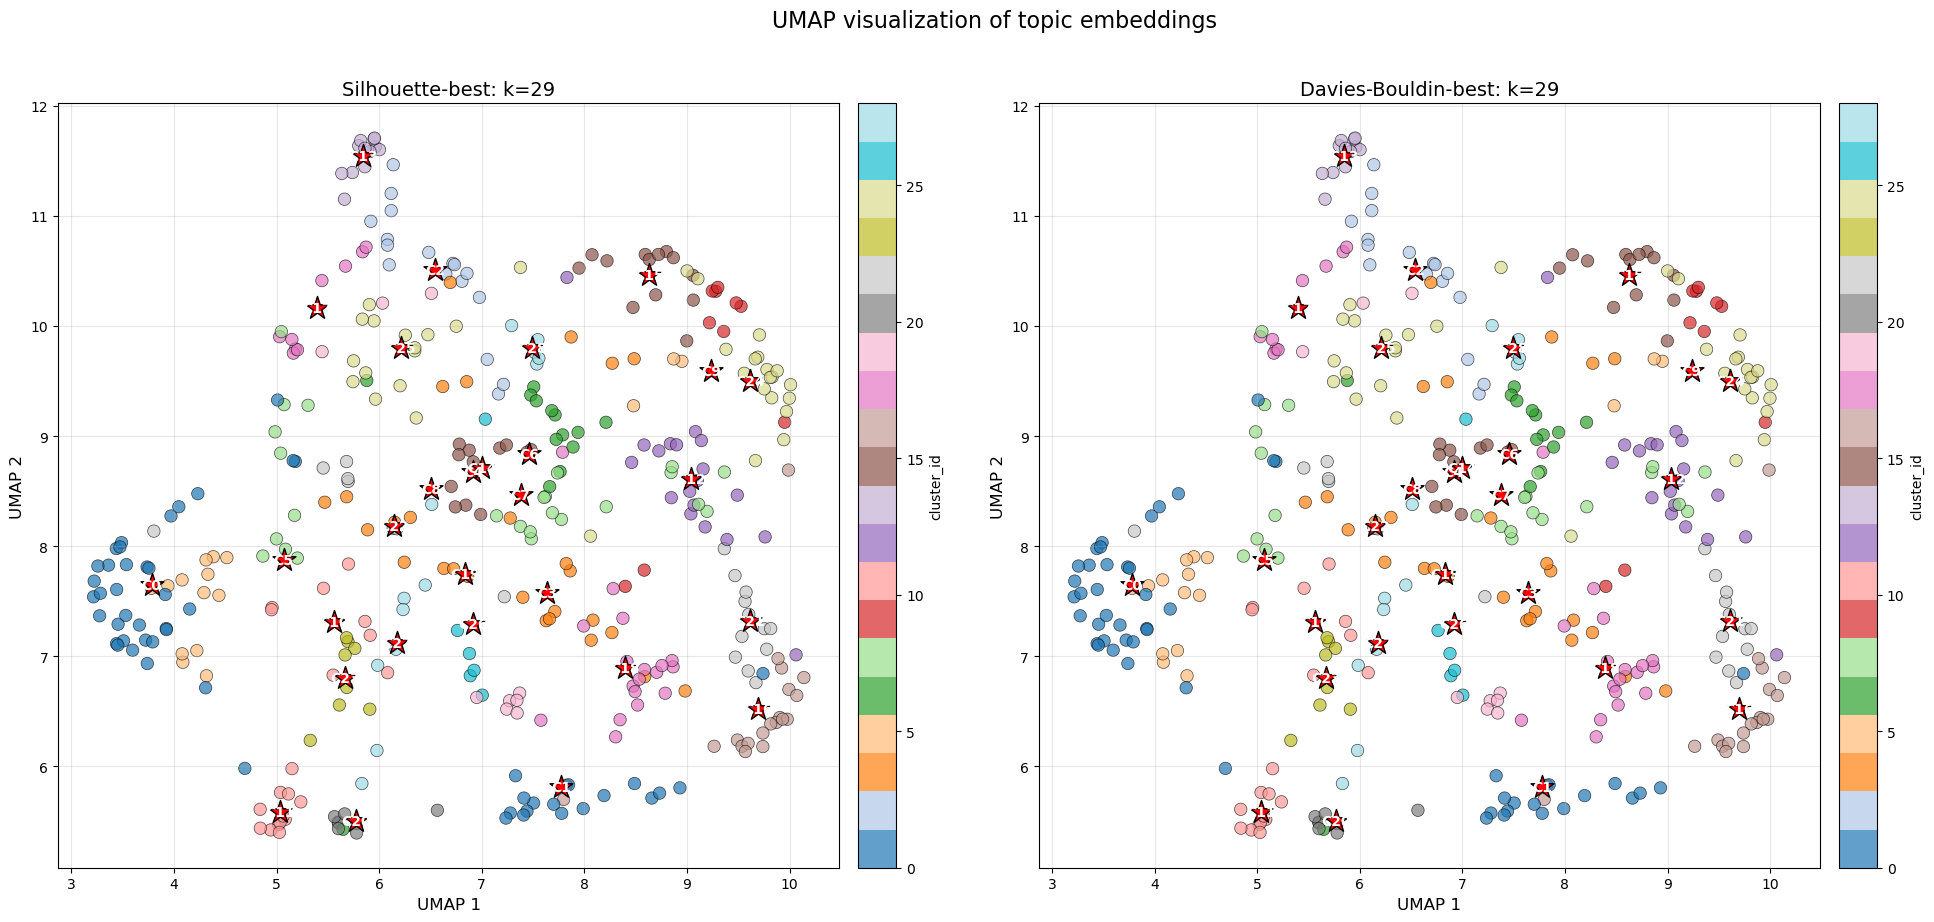

In [122]:
# Cluster with BOTH optimal k values (if not already done)
if "cluster_id_sil" not in df_cluster.columns:
    from sklearn.cluster import AgglomerativeClustering
    n_clusters_sil = optimal_k_silhouette
    n_clusters_db = optimal_k_db
    agg_clustering_sil = AgglomerativeClustering(n_clusters=n_clusters_sil)
    cluster_id_sil = agg_clustering_sil.fit_predict(X_normalized)
    
    agg_clustering_db = AgglomerativeClustering(n_clusters=n_clusters_db)
    cluster_id_db = agg_clustering_db.fit_predict(X_normalized)
    
    df_cluster["cluster_id_sil"] = cluster_id_sil
    df_cluster["cluster_id_db"] = cluster_id_db
    df_labels.loc[mask, "cluster_id_sil"] = cluster_id_sil
    df_labels.loc[mask, "cluster_id_db"] = cluster_id_db
    df_labels.loc[~mask, "cluster_id_sil"] = -1
    df_labels.loc[~mask, "cluster_id_db"] = -1
    
    print(f"Clustered with Silhouette-best: k={n_clusters_sil}, Davies-Bouldin-best: k={n_clusters_db}")
else:
    # Variables already exist, just get the k values
    n_clusters_sil = len(df_cluster["cluster_id_sil"].unique())
    n_clusters_db = len(df_cluster["cluster_id_db"].unique())

# Reduce to 2D using UMAP and plot BOTH optimal clusterings side-by-side
import umap
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X2_umap = reducer.fit_transform(X_normalized)

fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# Left: Silhouette-best clustering
ax1 = axes[0]
sc1 = ax1.scatter(X2_umap[:, 0], X2_umap[:, 1], c=df_cluster["cluster_id_sil"], cmap="tab20", 
                  alpha=0.7, s=80, edgecolors='black', linewidth=0.5)
for cid in sorted(df_cluster["cluster_id_sil"].unique()):
    mask_cid = df_cluster["cluster_id_sil"] == cid
    if mask_cid.sum() > 0:
        centroid = X2_umap[mask_cid].mean(axis=0)
        ax1.scatter(centroid[0], centroid[1], c='red', marker='*', s=300, edgecolors='black', linewidth=1, zorder=10)
        ax1.annotate(f'C{cid}', (centroid[0], centroid[1]), fontsize=10, fontweight='bold', 
                    ha='center', va='center', color='white', zorder=11)
ax1.set_xlabel("UMAP 1", fontsize=12)
ax1.set_ylabel("UMAP 2", fontsize=12)
n_clusters_sil = optimal_k_silhouette if "cluster_id_sil" not in df_cluster.columns else len(df_cluster["cluster_id_sil"].unique())
n_clusters_db = optimal_k_db if "cluster_id_db" not in df_cluster.columns else len(df_cluster["cluster_id_db"].unique())
ax1.set_title(f"Silhouette-best: k={n_clusters_sil}", fontsize=14)
plt.colorbar(sc1, ax=ax1, label="cluster_id", pad=0.02)
ax1.grid(True, alpha=0.3)

# Right: Davies-Bouldin-best clustering
ax2 = axes[1]
sc2 = ax2.scatter(X2_umap[:, 0], X2_umap[:, 1], c=df_cluster["cluster_id_db"], cmap="tab20", 
                  alpha=0.7, s=80, edgecolors='black', linewidth=0.5)
for cid in sorted(df_cluster["cluster_id_db"].unique()):
    mask_cid = df_cluster["cluster_id_db"] == cid
    if mask_cid.sum() > 0:
        centroid = X2_umap[mask_cid].mean(axis=0)
        ax2.scatter(centroid[0], centroid[1], c='red', marker='*', s=300, edgecolors='black', linewidth=1, zorder=10)
        ax2.annotate(f'C{cid}', (centroid[0], centroid[1]), fontsize=10, fontweight='bold', 
                    ha='center', va='center', color='white', zorder=11)
ax2.set_xlabel("UMAP 1", fontsize=12)
ax2.set_ylabel("UMAP 2", fontsize=12)
ax2.set_title(f"Davies-Bouldin-best: k={n_clusters_db}", fontsize=14)
plt.colorbar(sc2, ax=ax2, label="cluster_id", pad=0.02)
ax2.grid(True, alpha=0.3)

plt.suptitle("UMAP visualization of topic embeddings", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [123]:
# REPLACE CELL 32: Cluster with BOTH optimal k values
# Silhouette-best clustering
n_clusters_sil = optimal_k_silhouette
agg_clustering_sil = AgglomerativeClustering(n_clusters=n_clusters_sil)
cluster_id_sil = agg_clustering_sil.fit_predict(X_normalized)

# Davies-Bouldin-best clustering  
n_clusters_db = optimal_k_db
agg_clustering_db = AgglomerativeClustering(n_clusters=n_clusters_db)
cluster_id_db = agg_clustering_db.fit_predict(X_normalized)

# Store both results
df_cluster["cluster_id_sil"] = cluster_id_sil
df_cluster["cluster_id_db"] = cluster_id_db
df_labels.loc[mask, "cluster_id_sil"] = cluster_id_sil
df_labels.loc[mask, "cluster_id_db"] = cluster_id_db
df_labels.loc[~mask, "cluster_id_sil"] = -1
df_labels.loc[~mask, "cluster_id_db"] = -1

print(f"Silhouette-best: n_clusters={n_clusters_sil}")
print(f"Davies-Bouldin-best: n_clusters={n_clusters_db}")
print(f"\nClustered {len(df_cluster)} topics (topic_id -1 kept as noise).")
print("\nPreview (Silhouette-best):")
display(df_cluster[["topic_id", "short_label", "cluster_id_sil"]].head(10))

Silhouette-best: n_clusters=29
Davies-Bouldin-best: n_clusters=29

Clustered 382 topics (topic_id -1 kept as noise).

Preview (Silhouette-best):


,topic_id,short_label,cluster_id_sil
0,0,Time Management,1
1,1,Netflix Shows,3
2,2,Gaming Discussion,18
3,3,Temperature Adaptation,17
4,4,Mask Mandate,4
5,5,Cooking and Food Criticism,23
6,6,NHL Hockey,4
7,7,COVID-19 vaccine hesitancy and concerns,25
8,8,Musician's Struggles,4
9,9,vaccine hesitancy,25


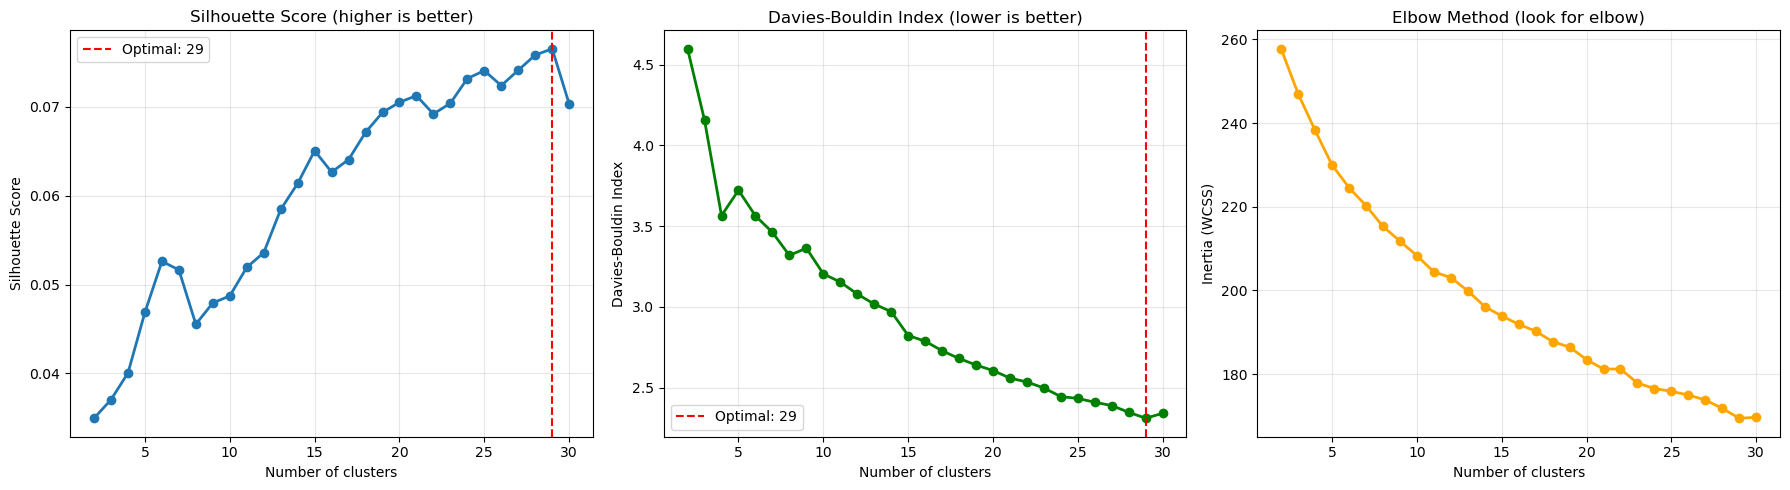


Top 5 cluster numbers by silhouette score:
  k=29: 0.077
  k=28: 0.076
  k=27: 0.074
  k=25: 0.074
  k=24: 0.073


In [124]:
# Visualize cluster evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette score
axes[0].plot(list(k_range), silhouette_scores, marker='o', linewidth=2, markersize=6)
axes[0].axvline(optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal: {optimal_k_silhouette}')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score (higher is better)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Davies-Bouldin index
axes[1].plot(list(k_range), db_scores, marker='o', color='green', linewidth=2, markersize=6)
axes[1].axvline(optimal_k_db, color='r', linestyle='--', label=f'Optimal: {optimal_k_db}')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index (lower is better)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Elbow method (inertia)
axes[2].plot(list(k_range), inertias, marker='o', color='orange', linewidth=2, markersize=6)
axes[2].set_xlabel('Number of clusters')
axes[2].set_ylabel('Inertia (WCSS)')
axes[2].set_title('Elbow Method (look for elbow)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show top candidates
print("\nTop 5 cluster numbers by silhouette score:")
top_sil = sorted(zip(k_range, silhouette_scores), key=lambda x: x[1], reverse=True)[:5]
for k, score in top_sil:
    print(f"  k={k}: {score:.3f}")

In [125]:
# Cluster using AgglomerativeClustering with optimal number of clusters
# Use the optimal k from silhouette score (or manually set if preferred)
# Options: optimal_k_silhouette, optimal_k_db, or set manually like n_clusters = 12
n_clusters = optimal_k_silhouette  # Change this to try different k values
print(f"\nClustering with n_clusters={n_clusters} (from silhouette score)")
print(f"To try a different k, change n_clusters above (e.g., n_clusters = {optimal_k_db} for DB optimal)")

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_id = agg_clustering.fit_predict(X_normalized)
df_cluster["cluster_id"] = cluster_id
df_labels.loc[mask, "cluster_id"] = cluster_id
df_labels.loc[~mask, "cluster_id"] = -1  # noise

print(f"Clustered {len(df_cluster)} topics into {n_clusters} clusters (topic_id -1 kept as noise).")
df_cluster[["topic_id", "short_label", "cluster_id"]].head(10)


Clustering with n_clusters=29 (from silhouette score)
To try a different k, change n_clusters above (e.g., n_clusters = 29 for DB optimal)
Clustered 382 topics into 29 clusters (topic_id -1 kept as noise).


,topic_id,short_label,cluster_id
0,0,Time Management,1
1,1,Netflix Shows,3
2,2,Gaming Discussion,18
3,3,Temperature Adaptation,17
4,4,Mask Mandate,4
5,5,Cooking and Food Criticism,23
6,6,NHL Hockey,4
7,7,COVID-19 vaccine hesitancy and concerns,25
8,8,Musician's Struggles,4
9,9,vaccine hesitancy,25


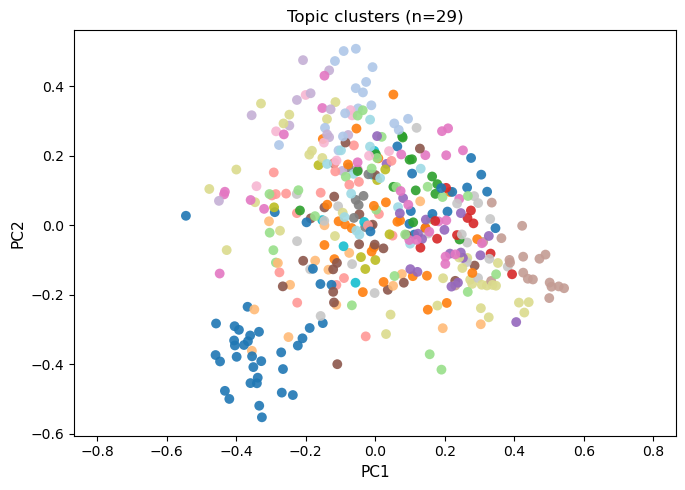

PCA variance explained: PC1=7.4%, PC2=6.0%, Total=13.5%


In [126]:
# Clean 2D map: one scatter, distinct cluster colors only
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_normalized)

fig, ax = plt.subplots(figsize=(7, 5), facecolor="white")
ax.set_facecolor("white")

# Single scatter — cluster_id maps to distinct colors (tab20)
sc = ax.scatter(
    X2[:, 0], X2[:, 1],
    c=df_cluster["cluster_id"],
    cmap="tab20",
    s=50,
    alpha=0.9,
    edgecolors="none",
)

ax.set_xlabel("PC1", fontsize=11)
ax.set_ylabel("PC2", fontsize=11)
ax.set_title(f"Topic clusters (n={n_clusters})", fontsize=12)
ax.set_aspect("equal", adjustable="datalim")
plt.tight_layout()
plt.show()

print(f"PCA variance explained: PC1={pca.explained_variance_ratio_[0]:.1%}, PC2={pca.explained_variance_ratio_[1]:.1%}, Total={pca.explained_variance_ratio_.sum():.1%}")

In [127]:
# Summary: clusters with labels (print FULL table, not preview)
cluster_summary = (
    df_cluster.groupby("cluster_id")
    .agg(
        topic_ids=("topic_id", list),
        short_labels=("short_label", list),
        n_topics=("topic_id", "count"),
    )
    .reset_index()
    .sort_values("cluster_id")
)
cluster_summary["example_label"] = cluster_summary["short_labels"].apply(lambda x: x[0] if x else None)

# Print full table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print(f"\nFull cluster summary (n_clusters={n_clusters}):")
print("=" * 100)
display(cluster_summary[["cluster_id", "n_topics", "example_label", "short_labels"]])


Full cluster summary (n_clusters=29):


,cluster_id,n_topics,example_label,short_labels
0,0,34,Cultural Travel,"[Cultural Travel, city vs rural, West Coast roots, Texas regional identity, Outdoor Escapes, Cal..."
1,1,18,Time Management,"[Time Management, Time Management, Technical Issues, Study Feedback, Road Trip Planning, First I..."
2,2,17,Christian Persecution,"[Christian Persecution, Politics Polarization, Privilege and Identity, American Exceptionalism, ..."
3,3,13,Netflix Shows,"[Netflix Shows, Social Media Detox, Music Taste, Stand-up Comedy Analysis, Movie Theater Industr..."
4,4,14,Mask Mandate,"[Mask Mandate, NHL Hockey, Musician's Struggles, Fitness Routine, Military Service, racing sport..."
5,5,16,Language Learning,"[Language Learning, Accent Identity, Canada vs America, Visa Issues, Soviet Union Legacy, Family..."
6,6,14,Chronic Illness,"[Chronic Illness, hair care, Tattoo Regrets, Autism Spectrum, Coping with Bipolar, glasses and v..."
7,7,11,sleep schedule struggles,"[sleep schedule struggles, Leisure activities, Daylight Savings, Staying at home, Balancing scho..."
8,8,14,Housing Costs,"[Housing Costs, Healthcare costs, Alternative Energy, Student Debt, Disability Struggles, Rental..."
9,9,10,Bookworms' habits,"[Bookworms' habits, Learning Python, Writing Community, Math Anxiety, College Life, Organic Chem..."


In [128]:
# Try different optimal k values and compare results
print("=" * 80)
print("COMPARING DIFFERENT OPTIMAL K VALUES")
print("=" * 80)

# Try top 3 k values from silhouette score
top_k_values = sorted(zip(k_range, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
k_to_try = [k for k, _ in top_k_values] + [optimal_k_db]  # Include DB optimal too
k_to_try = sorted(set(k_to_try))  # Remove duplicates

results_comparison = []

for k_test in k_to_try:
    agg_test = AgglomerativeClustering(n_clusters=k_test)
    labels_test = agg_test.fit_predict(X_normalized)
    
    sil = silhouette_score(X_normalized, labels_test)
    db = davies_bouldin_score(X_normalized, labels_test)
    
    # Count cluster sizes
    unique, counts = np.unique(labels_test, return_counts=True)
    min_size = counts.min()
    max_size = counts.max()
    mean_size = counts.mean()
    
    results_comparison.append({
        'k': k_test,
        'silhouette': sil,
        'davies_bouldin': db,
        'min_cluster_size': min_size,
        'max_cluster_size': max_size,
        'mean_cluster_size': f"{mean_size:.1f}",
        'n_clusters': len(unique)
    })
    
    print(f"\nk={k_test}: silhouette={sil:.3f}, DB={db:.3f}, sizes: min={min_size}, max={max_size}, mean={mean_size:.1f}")

comparison_df = pd.DataFrame(results_comparison)
print("\n" + "=" * 80)
print("COMPARISON TABLE:")
print("=" * 80)
display(comparison_df)

COMPARING DIFFERENT OPTIMAL K VALUES

k=27: silhouette=0.074, DB=2.390, sizes: min=6, max=34, mean=14.1

k=28: silhouette=0.076, DB=2.348, sizes: min=6, max=34, mean=13.6

k=29: silhouette=0.077, DB=2.311, sizes: min=5, max=34, mean=13.2

COMPARISON TABLE:


,k,silhouette,davies_bouldin,min_cluster_size,max_cluster_size,mean_cluster_size,n_clusters
0,27,0.074125,2.389670,6,34,14.1,27
1,28,0.075832,2.348123,6,34,13.6,28
2,29,0.076533,2.311350,5,34,13.2,29


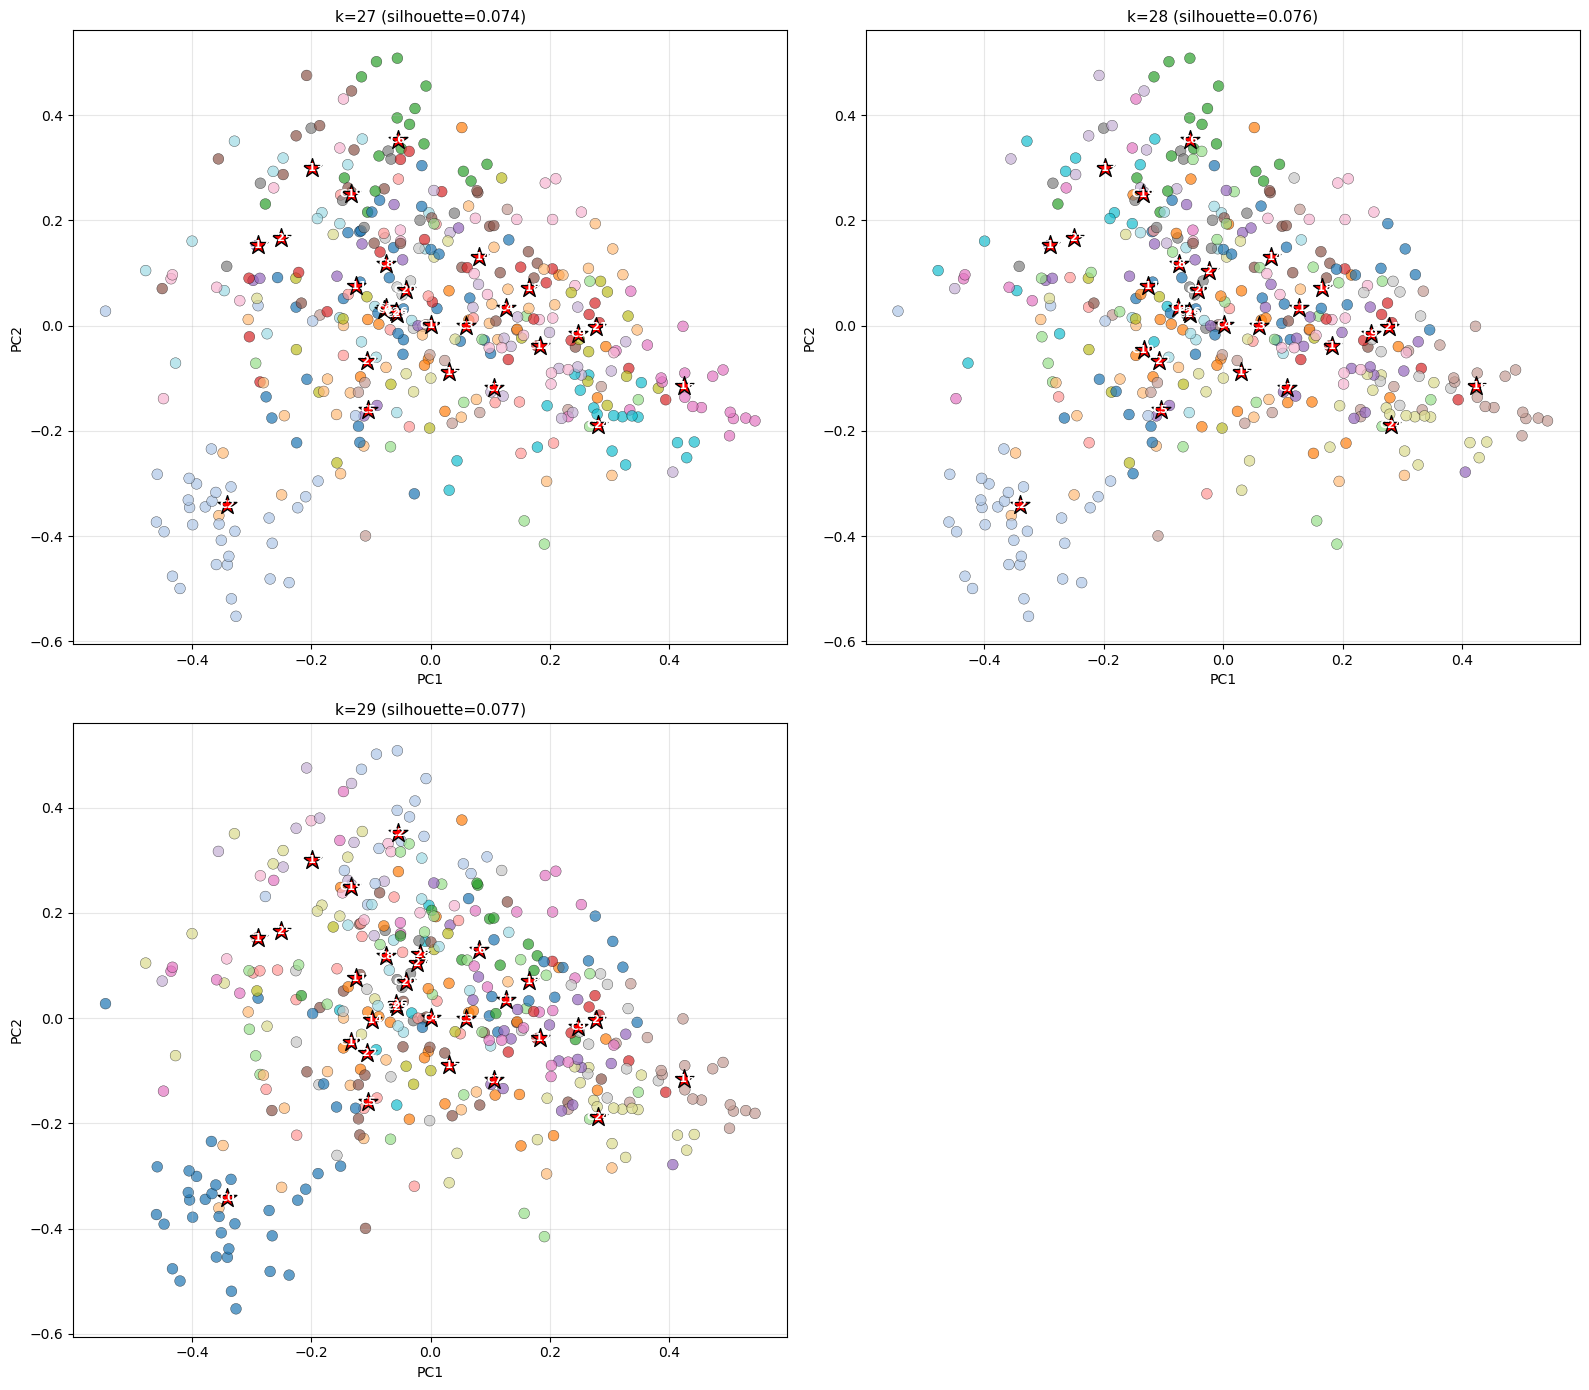

In [129]:
# Visualize different k values side-by-side
n_comparisons = min(4, len(k_to_try))
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, k_test in enumerate(k_to_try[:n_comparisons]):
    agg_test = AgglomerativeClustering(n_clusters=k_test)
    labels_test = agg_test.fit_predict(X_normalized)
    
    ax = axes[idx]
    sc = ax.scatter(X2[:, 0], X2[:, 1], c=labels_test, cmap="tab20", alpha=0.7, s=60, edgecolors='black', linewidth=0.3)
    
    # Add centroids
    for cid in sorted(set(labels_test)):
        mask_cid = labels_test == cid
        if mask_cid.sum() > 0:
            centroid = X2[mask_cid].mean(axis=0)
            ax.scatter(centroid[0], centroid[1], c='red', marker='*', s=200, edgecolors='black', linewidth=1, zorder=10)
            ax.annotate(f'C{cid}', (centroid[0], centroid[1]), fontsize=8, fontweight='bold', 
                       ha='center', va='center', color='white', zorder=11)
    
    sil = silhouette_score(X_normalized, labels_test)
    ax.set_title(f'k={k_test} (silhouette={sil:.3f})', fontsize=11)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(n_comparisons, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [130]:
df_cluster["cluster_id"].value_counts().sort_index()

cluster_id
0     34
1     18
2     17
3     13
4     14
5     16
6     14
7     11
8     14
9     10
10     8
11    12
12    19
13    12
14    12
15    13
16    19
17     9
18    19
19     9
20     8
21    11
22     9
23     8
24    19
25    15
26     6
27     8
28     5
Name: count, dtype: int64

---
### 5. Test cluster labeling prompt (for 5_label_clusters.py)  
**Preset:** Run the cell below (CLUSTER_PROMPT, `format_topic_summaries`, `build_cluster_prompt`). Requires `run_llm` from Section 2, and `topic_cluster_map.csv` + `topic-label_all.csv`.

Tests the prompt used in `scripts/5_label_clusters.py` to label clusters based on their constituent topic labels.

In [131]:
# ---------- Preset: Section 5 (Cluster labeling) — prompt from 5_label_clusters.py ----------
# Prompt used in 5_label_clusters.py for LLM-based cluster labeling
CLUSTER_PROMPT = """You are an expert annotator analyzing a group of related conversation topics that form a cluster.
All the topics below belong to the same cluster.

### Cluster ID: {cluster_id}

### Topics in this cluster
{topic_summaries}

### Task
Based on these topics, infer the overarching theme or category that unifies them.
Produce only a one-row Markdown table with:

- cluster_id: {cluster_id}
- cluster_label: a concise 2–5 word name for this cluster
- cluster_summary: one sentence describing the common theme or category
- cluster_keywords: 3–8 key words or phrases (comma separated)

### Output format (very important)
| cluster_id | cluster_label | cluster_summary | cluster_keywords |
|------------|---------------|-----------------|------------------|
| {cluster_id} | ... | ... | ... |

Do not add extra commentary."""

CLUSTER_SYSTEM = "You are an expert annotator analyzing groups of related conversation topics."

def format_topic_summaries(df_topics: pd.DataFrame) -> str:
    """Format topic labels into a readable summary block for the prompt (same as 5_label_clusters.py)."""
    lines = []
    for idx, row in df_topics.iterrows():
        topic_id = row.get("topic_id", idx)
        short_label = row.get("short_label", "N/A")
        summary = row.get("summary", "")
        keywords = row.get("keywords", "")
        
        parts = [f"Topic {topic_id}: {short_label}"]
        if summary:
            parts.append(f"Summary: {summary}")
        if keywords:
            parts.append(f"Keywords: {keywords}")
        lines.append("- " + " | ".join(parts))
    return "\n".join(lines)

def build_cluster_prompt(cluster_id: int, topic_summaries: str) -> str:
    return CLUSTER_PROMPT.format(cluster_id=cluster_id, topic_summaries=topic_summaries)

In [133]:
# Test on one cluster: load cluster map + topic labels, merge, format one cluster, run prompt
# Requires: run_llm from Section 2, and data files from scripts 4_cluster_topics.py and 3_label_bertopics.py
CLUSTER_MAP_CSV = "data/topic_cluster_map.csv"
TOPIC_LABEL_CSV = "data/topic-label_all.csv"

# Load cluster map and topic labels
cluster_map = pd.read_csv(CLUSTER_MAP_CSV)
topic_labels = pd.read_csv(TOPIC_LABEL_CSV)

# Merge to get topics per cluster
df_cluster_topics = cluster_map.merge(topic_labels, on="topic_id", how="inner")

# Pick one cluster to test (e.g., cluster_id 0 or one with several topics)
# test_cluster_id = df_cluster_topics["cluster_id"].value_counts().index[0]  # Most common cluster
test_cluster_id = 5
df_test = df_cluster_topics[df_cluster_topics["cluster_id"] == test_cluster_id].copy()

print(f"Testing cluster {test_cluster_id} with {len(df_test)} topics:")
print(f"Topics: {df_test['topic_id'].tolist()[:10]}...")  # Show first 10

# Format topic summaries
topic_summaries = format_topic_summaries(df_test[["topic_id", "short_label", "summary", "keywords"]])

# Build prompt
prompt = build_cluster_prompt(test_cluster_id, topic_summaries)

# Run LLM (run_llm uses SYSTEM from Section 2; CLUSTER_SYSTEM is defined above but not used by run_llm)
# Note: In 5_label_clusters.py, the system message is CLUSTER_SYSTEM, but here run_llm uses Section 2's SYSTEM.
out = run_llm(prompt, max_new_tokens=220)

print(f"\n--- Cluster {test_cluster_id} labeling result ---")
print(out)

Testing cluster 5 with 16 topics:
Topics: [20, 74, 99, 109, 143, 155, 161, 194, 256, 257]...

--- Cluster 5 labeling result ---
| cluster_id | cluster_label | cluster_summary | cluster_keywords |
|------------|---------------|-----------------|------------------|
| 5 | Language & Culture | Discussion of language, culture, and identity in various contexts | language learning, accent identity, cultural differences, visa issues, language teaching, expat life, family history, online english teaching, deaf culture, moving to canada, teaching english abroad, study abroad, german roots, dual citizenship, ethnic diversity |


In [134]:
def parse_cluster_table(llm_output: str) -> dict:
    """Parse LLM output table to extract cluster_id, cluster_label, cluster_summary, cluster_keywords."""
    # Normalize: single newlines, strip
    text = ("\n".join(line.strip() for line in llm_output.strip().splitlines())).strip()

    # 1) Look for markdown table (flexible: optional header/separator, any line with 4 pipe cells)
    # Data row: | id | label | summary | keywords |
    data_row_match = re.search(
        r"\|?\s*(\d+)\s*\|\s*([^|]*?)\s*\|\s*([^|]*?)\s*\|\s*([^|]*?)\s*\|",
        text,
        re.MULTILINE | re.DOTALL,
    )
    if data_row_match:
        return {
            "cluster_id": int(data_row_match.group(1)),
            "cluster_label": data_row_match.group(2).strip(),
            "cluster_summary": data_row_match.group(3).strip(),
            "cluster_keywords": data_row_match.group(4).strip(),
        }

In [135]:
parse_cluster_table(out)

{'cluster_id': 5,
 'cluster_label': 'Language & Culture',
 'cluster_summary': 'Discussion of language, culture, and identity in various contexts',
 'cluster_keywords': 'language learning, accent identity, cultural differences, visa issues, language teaching, expat life, family history, online english teaching, deaf culture, moving to canada, teaching english abroad, study abroad, german roots, dual citizenship, ethnic diversity'}